In [16]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [17]:
import pandas as pd
import numpy as np
import mpslib as mps
import matplotlib.pyplot as plt

# Setup MPSLib

In [18]:
simulation_number = 0
simulation_grid_size = [80, 50, 1]

In [19]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib()

# O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=simulation_grid_size)
# O.par["rseed"] = 1
# O.par["template_size"] = np.array([8, 7, 1])
# O.par["out_folder"] = f"../data/simulated/simulation_{simulation_number}/"
# O.par['n_cond']=25  # Number of neighbors necessary
# O.par['n_real']=16  # Number of realizations
# O.par['n_threads']=9
# O.par["n_max_cpdf_count"] = 1
# O.par['do_entropy'] = 1   # 1 Calculates the entropy

# O.par["shuffle_simulation_grid"] = 2
# O.par["n_multiple_grids"] = 3
# O.par['simulation_grid_size']=np.array(simulation_grid_size)
# O.par["debug_level"] = 1
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]

O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=16
O.par['n_threads']=10
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array([80,50,1])

Using mps_genesim installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)
Using mps_snesim_tree installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)


# Choose training image

In [20]:
# np.random.seed(0)
# idx = np.random.randint(0, 1000)
idx = 4

path = f"../data/eas/Parker_binary_{idx}.dat"
eas_file = mps.eas.read(filename=path)
O.par['ti_fnam'] = path

# TI = eas_file["D"]
# plt.imshow(TI)
# plt.title(f"Binary Parker at {idx}")
# plt.show()

# Simulation and parameters

In [21]:
O.par

{'n_real': 16,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': '../data/eas/Parker_binary_4.dat',
 'simulation_grid_size': array([80, 50,  1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 10,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 25}

In [22]:
O.run_parallel()

parallel: Using 8 of max 10 threads


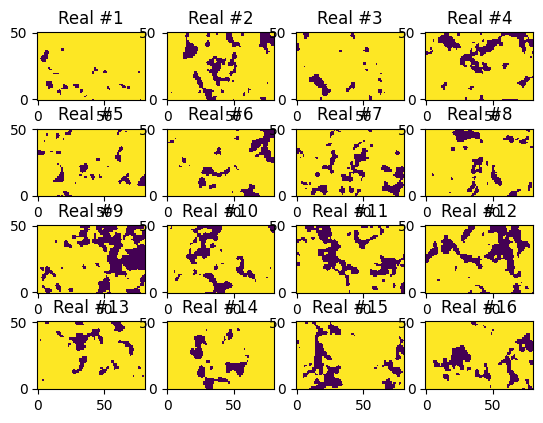

In [23]:
O.plot_reals()

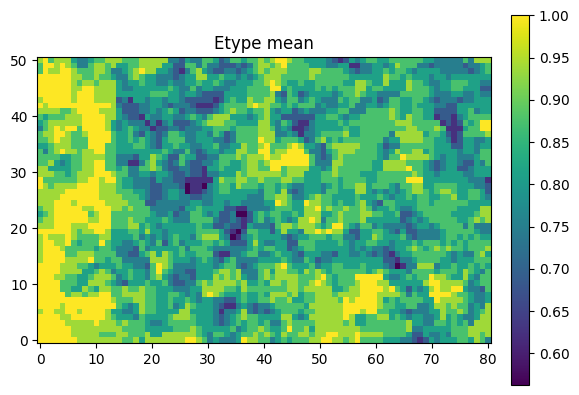

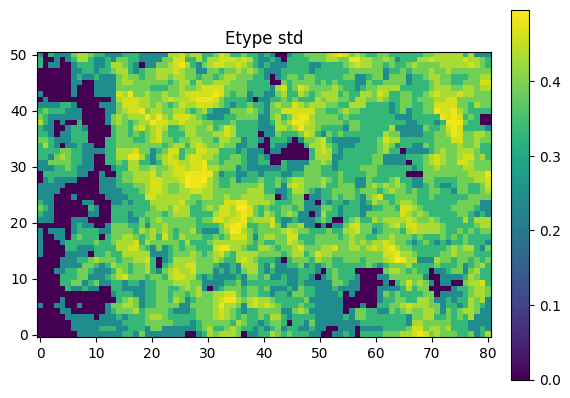

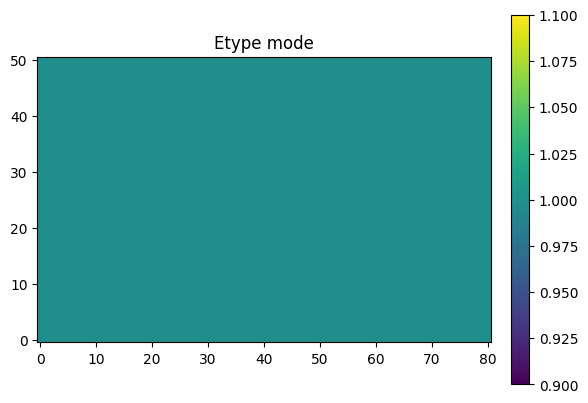

In [24]:
O.plot_etype()